# Data Import

In [1]:
from dotenv import load_dotenv

load_dotenv(override=True)  # 👈 force reload if values were already set


True

In [2]:
import os


BASE_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
# Go up two levels


In [3]:
import os
print(os.getenv('DB_HOST'), os.getenv('DB_USER'), os.getenv('DB_PASSWORD'), os.getenv('DB_NAME'))


127.0.0.1 root MySQL31# text_dataset_db


In [4]:
import pymysql
from dotenv import load_dotenv


# ✅ Load environment variables from the .env file
load_dotenv()

# ✅ Fetch database configuration from environment variables
db_config = {
    'host': os.getenv('DB_HOST'),
    'user': os.getenv('DB_USER'),
    'password': os.getenv('DB_PASSWORD'),
    'database': os.getenv('DB_NAME')
}

# ✅ Connect to MySQL using PyMySQL
conn = pymysql.connect(**db_config)
cursor = conn.cursor()

# ✅ Define a function to fetch content based on the level
def fetch_data_by_level(level):
    query = "SELECT content FROM text_data WHERE level = %s"
    cursor.execute(query, (level,))
    rows = cursor.fetchall()
    return [row[0] for row in rows]

# ✅ Fetch data for each level
L1= fetch_data_by_level('L1')
L2 = fetch_data_by_level('L2')
L3 = fetch_data_by_level('L3')
L4 = fetch_data_by_level('L4')

# ✅ Close the cursor and connection
cursor.close()
conn.close()

# ✅ Print samples (optional)
print("L1 Data Sample:", L1[0][:5000] if L1 else "No data found")
print("L2 Data Sample:", L2[0][:500] if L2 else "No data found")
print("L3 Data Sample:", L3[0][:500] if L3 else "No data found")
print("L4 Data Sample:", L4[0][:5000] if L4 else "No data found")


L1 Data Sample:  Once upon a time in the land of Policymia, there lived two leaders named Majora and Minoro. Their job was to make sure all the citizens had beautiful parks, clean water, and top-notch schools. But there were so many things to fix! How would they ever decide where to start?
L2 Data Sample: usually , he would be tearing around the living room , playing with his toys .
L3 Data Sample: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as s
L4 Data Sample: Research on Neural Machine Translation Model


In [5]:
# Concatenate all content from L1, L2, L3, L4 into single strings
L1_combined = " ".join(L1) if L1 else ""
L2_combined = " ".join(L2) if L2 else ""
L3_combined = " ".join(L3) if L3 else ""
L4_combined = " ".join(L4) if L4 else ""

In [6]:
print("L1 Data Sample:", L1_combined[:500] )
print("L2 Data Sample:", L2_combined[:500] )
print("L3 Data Sample:", L3_combined[:500] )
print("L4 Data Sample:", L4_combined[:500] )

L1 Data Sample:  Once upon a time in the land of Policymia, there lived two leaders named Majora and Minoro. Their job was to make sure all the citizens had beautiful parks, clean water, and top-notch schools. But there were so many things to fix! How would they ever decide where to start?  Majora, being the wise leader she was, knew just what to do. She invited her fellow policymakers for a big meeting at the Roundtable of Representatives. There, they discussed the most important problems Policymia faced. This
L2 Data Sample: usually , he would be tearing around the living room , playing with his toys . but just one look at a minion sent him practically catatonic . that had been megan 's plan when she got him dressed earlier . he 'd seen the movie almost by mistake , considering he was a little young for the pg cartoon , but with older cousins , along with her brothers , mason was often exposed to things that were older . she liked to think being surrounded by adults and older kids wa

## Hugging Face Dataset

In [7]:
# import requests

# with open("Data/L1_ChildrenStories.txt", "r", encoding="utf-8") as f:
#     L1 = f.read()
# with open("Data/L2_BookCorpus.txt", "r", encoding="utf-8") as f:
#     L2 = f.read()
# with open("Data/L3_CNN_DailyMail.txt", "r", encoding="utf-8") as f:
#     L3 = f.read()
# with open("Data/L4_S2ORC.txt", "r", encoding="utf-8") as f:
#     L4 = f.read()

# Data Cleaning

In [8]:
!pip install emoji
import re
import emoji

# Define allowed character sets
english_regex = r"[a-zA-Z0-9\s]"                   # English letters, numbers, spaces
math_symbols  = r"[\+\-\*/=<>∑∫√πθΣ∂∞]"             # Add more math symbols if needed
special_chars = r"[\.,!?;:'\"()\[\]{}#@%^&*_~]"     # Common special characters

# Function to clean a given text
def clean_text(text):
    return "".join(
        c for c in text
        if re.match(english_regex, c) or 
           re.match(math_symbols, c) or 
           re.match(special_chars, c) or 
           emoji.is_emoji(c)
    )

# Apply cleaning to all levels
# L1_cleaned = clean_text(L1)
# L2_cleaned = clean_text(L2)
# L3_cleaned = clean_text(L3)
# L4_cleaned = clean_text(L4)
L1_cleaned = clean_text(L1_combined)
L2_cleaned = clean_text(L2_combined)
L3_cleaned = clean_text(L3_combined)
L4_cleaned = clean_text(L4_combined)
print("All levels cleaned and stored in *_cleaned variables!")


All levels cleaned and stored in *_cleaned variables!


In [9]:
full_text = L1_cleaned+L2_cleaned+L3_cleaned+L4_cleaned
D = len(full_text)
D

419268673

# Data Stats

In [10]:
chars = sorted(list(set(full_text)))
vocab_size = len(chars)

token = full_text.encode("utf-8")
def get_stats(ids):
    counts = {} # Creates an empty Dictionary
    for pair in zip(ids,ids[1:]):
        counts[pair] = counts.get(pair ,0)+1
    return counts
print(vocab_size)
print(''.join(chars))
stats = get_stats(token)
top_pair = max(stats,key=stats.get)
top_pair

208
	
 !"#%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_abcdefghijklmnopqrstuvwxyz{}~ ©®Σθπ  ™↔↘↪∂∑√∞∫▪▫▶☀☁☄☺♀♣♥♦♻⚙⚠⚡✏✔✨❤🌈🌍🌏🌐🌞🌟🌬🌱🌳🌸🌻🌿🍃🍇🍊🍞🍡🍭🎉🎮🎶🏠🏡🏰🏼🏽🐇🐛🐦🐰🐿👑👧👨💁💎💕💖💚💡💪💻💾📃📊📚📝📡📣📱📲🔒🔗🔬🕊🖥🗣😁😂😃😄😊😎😐😔😢😮🚀🚧🚯🤖🤩🤯🥗🥦🦉🦋🦝


(101, 32)

# BPE

In [11]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import ByteLevel
from tokenizers.decoders import ByteLevel as ByteLevelDecoder

# Your cleaned text data
docs = [L1_cleaned, L2_cleaned, L3_cleaned, L4_cleaned]

# Break large documents into smaller lines/chunks
def chunked_docs():
    for doc in docs:
        # You can tweak the split here (e.g., '. ' or '\n' or custom logic)
        for line in doc.split('\n'):
            line = line.strip()
            if line:
                yield line

# Initialize BPE tokenizer
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = ByteLevel()
tokenizer.decoder = ByteLevelDecoder()

# Trainer with manageable vocab size
trainer = BpeTrainer(vocab_size=2000, special_tokens=["[UNK]"])

# Train using iterator to save memory
tokenizer.train_from_iterator(chunked_docs(), trainer=trainer)

# Check final vocab size
print("Actual vocab size:", tokenizer.get_vocab_size())





Actual vocab size: 2000


In [12]:
def encode(text: str) -> list[int]:
    return tokenizer.encode(text).ids

def decode(token_ids: list[int]) -> str:
    return tokenizer.decode(token_ids)
sample = "math is beautiful ✨"
ids = encode(sample)
print("→", ids)
print("←", decode(ids))

→ [651, 69, 246, 1375, 124, 120, 152, 98]
←  math is beautiful ✨


# GPT Like Transformer

In [13]:
import os
import joblib
import torch
from TransformerMS.Model.model_architecture import GPTLanguageModel
from torch.optim import AdamW
import sys
sys.path.append(os.getcwd())



# Configuration (expanded with missing parameters)
class Config:
    vocab_size = tokenizer.get_vocab_size()
    batch_size = 16
    block_size = 32
    max_iters = 5000
    eval_interval = 100
    learning_rate = 1e-3
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    eval_iters = 200
    n_embd = 64
    n_head = 4
    n_layer = 4
    dropout = 0.0
    checkpoint_dir = os.path.join(BASE_DIR, "checkpoints")


# ------------------ Training Utilities ------------------
def get_batch_transformer(data):
    ix = torch.randint(len(data) - Config.block_size, (Config.batch_size,))
    x = torch.stack([data[i:i+Config.block_size] for i in ix]).to(Config.device)
    y = torch.stack([data[i+1:i+Config.block_size+1] for i in ix]).to(Config.device)
    return x, y

@torch.no_grad()
def estimate_loss_transformer(model, train_data, val_data):
    model.eval()
    out = {}
    for split, data in zip(['train','val'], [train_data, val_data]):
        losses = []
        for _ in range(Config.eval_iters):
            X, Y = get_batch_transformer(data)
            _, loss = model(X, Y)
            losses.append(loss.item())
        out[split] = sum(losses) / len(losses)
    model.train()
    return out

def compute_perplexity(loss):
    return torch.exp(torch.tensor(loss))

# ------------------ Training Pipeline ------------------
all_metrics = {
    "level": [], "iters": [],
    "train_loss": [], "val_loss": [],
    "train_ppl": [], "val_ppl": []
}
def incremental_training_pipeline(level_texts, model, tokenizer):
    os.makedirs(Config.checkpoint_dir, exist_ok=True)
    
    # all_metrics = {
    #     "level": [], "iters": [],
    #     "train_loss": [], "val_loss": [],
    #     "train_ppl": [], "val_ppl": []
    # }

    for level_i, level_text in enumerate(level_texts, start=1):
        print(f"\n=== LEVEL {level_i} TRAINING ===")
        
        # Encode text using tokenizer
        data_ids = torch.tensor(tokenizer.encode(level_text).ids, 
                    dtype=torch.long).to(Config.device)
        
        # Train/validation split
        n = int(0.9 * data_ids.size(0))
        train_data = data_ids[:n]
        val_data = data_ids[n:]

        optimizer = AdamW(model.parameters(), lr=Config.learning_rate)
        
        for it in range(Config.max_iters):
            if it % Config.eval_interval == 0:
                losses = estimate_loss_transformer(model, train_data, val_data)
                ppl_train = compute_perplexity(losses['train'])
                ppl_val = compute_perplexity(losses['val'])

                # Update metrics
                all_metrics["level"].append(level_i)
                all_metrics["iters"].append(it)
                all_metrics["train_loss"].append(losses['train'])
                all_metrics["val_loss"].append(losses['val'])
                all_metrics["train_ppl"].append(ppl_train.item())
                all_metrics["val_ppl"].append(ppl_val.item())

                print(f"Iter {it:4d} | Train loss {losses['train']:.4f} (ppl {ppl_train:.2f}) | "
                      f"Val loss {losses['val']:.4f} (ppl {ppl_val:.2f})")

            # Training step
            xb, yb = get_batch_transformer(train_data)
            _, loss = model(xb, yb)
            optimizer.zero_grad(set_to_none=True)
            loss.backward()
            optimizer.step()

        # Final evaluation
        losses = estimate_loss_transformer(model, train_data, val_data)
        print(f"\nLevel {level_i} complete:")
        print(f"Final train loss: {losses['train']:.4f}")
        print(f"Final val loss:   {losses['val']:.4f}")

        # Generate sample
        context = torch.zeros((1,1), dtype=torch.long, device=Config.device)
        sample_ids = model.generate(context, max_new_tokens=500)[0].tolist()
        print("\nSample:", tokenizer.decode(sample_ids))

        # Save checkpoint
        cp = os.path.join(Config.checkpoint_dir, f"model_level{level_i}.pt")
        torch.save(model.state_dict(), cp)
        print(f"Saved checkpoint: {cp}")

    return model, all_metrics

# ------------------ Main Execution ------------------
# Initialize tokenizer and model
tokenizer = joblib.load(os.path.join(BASE_DIR, 'Joblibs', 'tokenizer.joblib'))  # Your trained tokenizer
level_texts = [L1_cleaned, L2_cleaned, L3_cleaned, L4_cleaned]  # Your data

# Initialize model with proper configuration
model = GPTLanguageModel(
    vocab_size=tokenizer.get_vocab_size(),
    block_size=Config.block_size,
    n_embd=Config.n_embd,
    n_head=Config.n_head,
    n_layer=Config.n_layer,
    dropout=Config.dropout
).to(Config.device)

# Run training
trained_model, metrics = incremental_training_pipeline(level_texts, model, tokenizer)




=== LEVEL 1 TRAINING ===
Iter    0 | Train loss 7.6196 (ppl 2037.70) | Val loss 7.6188 (ppl 2036.03)
Iter  100 | Train loss 6.3703 (ppl 584.25) | Val loss 6.3609 (ppl 578.78)
Iter  200 | Train loss 5.7067 (ppl 300.88) | Val loss 5.6977 (ppl 298.18)
Iter  300 | Train loss 5.3331 (ppl 207.08) | Val loss 5.3253 (ppl 205.47)
Iter  400 | Train loss 5.0601 (ppl 157.61) | Val loss 5.0796 (ppl 160.72)

Level 1 complete:
Final train loss: 4.8839
Final val loss:   4.8727

Sample:  before aiosious goods.  In herand what stusing sad to scientas like the Tood, appTOggest Fort-ut so named She had rustedact, lexteth's leadcept like and grologious table of this v a different technents last best and they felt those intore? A corricothly, no about it pibarthant to find them a headed, another big Tty had-imousiciring during a time. " She had a wavanash necess drath herpite many knowledge in a belam still today started images; "I think during you, they, but process not respect their pl made Tual of feact

In [14]:
for i, level in enumerate(level_texts, start=1):
    D = len(level)
    total_tokens_seen = Config.block_size * Config.batch_size * Config.max_iters
    epochs = total_tokens_seen / D
    print(f"Total Epochs for Level {i}: {epochs:.4f}")



Total Epochs for Level 1: 0.0024
Total Epochs for Level 2: 0.0024
Total Epochs for Level 3: 0.0024
Total Epochs for Level 4: 0.0025


In [15]:
import sacrebleu
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

# Load BART model/tokenizer once
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bart_model_name = 'facebook/bart-large-cnn'
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name).to(device)
bart_model.eval()

# Function to calculate BLEU
def compute_bleu(references, hypotheses):
    bleu = sacrebleu.corpus_bleu(hypotheses, [references])
    return bleu.score

# Function to calculate BARTScore
def compute_bart_score(references, hypotheses):
    scores = []
    for ref, hyp in zip(references, hypotheses):
        input_ids = bart_tokenizer(hyp, return_tensors="pt").input_ids.to(device)
        with bart_tokenizer.as_target_tokenizer():
            target_ids = bart_tokenizer(ref, return_tensors="pt").input_ids.to(device)

        with torch.no_grad():
            output = bart_model(input_ids=input_ids, labels=target_ids)
            log_likelihood = -output.loss * target_ids.size(1)
            scores.append(log_likelihood.item())
    
    return sum(scores) / len(scores)


In [16]:
# Generate a sample from your model
context = torch.zeros((1, 1), dtype=torch.long, device=Config.device)
sample_ids = model.generate(context, max_new_tokens=50)[0].tolist()
generated_text = tokenizer.decode(sample_ids)


In [17]:
# import time
# start = time.time()
# encoded = tokenizer.encode(full_text).ids
# print(f"Encoding took {time.time() - start:.2f} seconds")


In [18]:
import time
import torch

# Step 1: Take last 10% of the raw text
start = time.time()
val_text = full_text[int(0.9 * len(full_text)):]  # slicing the string
print(f"Text slicing took {time.time() - start:.2f} seconds")

# Step 2: Tokenize only the validation text
start = time.time()
val_ids = tokenizer.encode(val_text).ids
print(f"Tokenizing val_text took {time.time() - start:.2f} seconds")

# Step 3: Convert to tensor and move to device
start = time.time()
val_data = torch.tensor(val_ids, dtype=torch.long)
print(f"Tensor creation and device transfer took {time.time() - start:.2f} seconds")

# Step 4: Sample first 50 tokens and decode
start = time.time()
ref_ids = val_data[:50].tolist()
reference_text = tokenizer.decode(ref_ids)
print(f"Decoding took {time.time() - start:.2f} seconds")


Text slicing took 0.25 seconds
Tokenizing val_text took 22.41 seconds
Tensor creation and device transfer took 0.55 seconds
Decoding took 0.00 seconds


In [19]:
# # Reference and generated texts (can be lists from your evaluation step)
# references = ["The cat is sitting on the mat.", "The weather is sunny today."]
# generated = ["A cat is on the mat.", "It is sunny outside."]
references = [reference_text]
generated = [generated_text]


bleu = compute_bleu(references, generated)
bart = compute_bart_score(references, generated)

print(f"\nBLEU Score:     {bleu:.2f}")
print(f"BARTScore (avg): {bart:.2f}")


/opt/anaconda3/envs/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:3970: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(



BLEU Score:     1.31
BARTScore (avg): -187.00


In [20]:
# import os
# import torch
# import torch.nn as nn
# from torch.nn import functional as F

# # ------------------ Hyperparameters ------------------
# batch_size = 16 # how many independent sequences will we process in parallel?
# block_size = 32 # what is the maximum context length for predictions?
# max_iters = 5000
# eval_interval = 100
# learning_rate = 1e-3
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# eval_iters = 200
# n_embd = 64
# n_head = 4
# n_layer = 4
# dropout = 0.0
# # # ------------
# # # # hyperparameters for GPU
# # batch_size = 128 # how many independent sequences will we process in parallel?
# # block_size = 512 # what is the maximum context length for predictions?
# # max_iters = 10000
# # eval_interval = 500
# # learning_rate = 3e-4
# # device = 'cuda' if torch.cuda.is_available() else 'cpu'
# # eval_iters = 200
# # n_embd = 384
# # n_head = 6
# # n_layer = 6
# # dropout = 0.2
# # # # ------------

# torch.manual_seed(1337)

# # ------------------ BPE tokenizer functions (assumed defined) ------------------
# # encode(text) -> list of token ids
# # decode(ids)   -> string
# # merges, vocab, etc. already built above in your notebook

# # ------------------ Data loader for transformer ------------------
# def get_batch_transformer(data):
#     ix = torch.randint(len(data) - block_size, (batch_size,))
#     x  = torch.stack([data[i:i+block_size] for i in ix]).to(device)
#     y  = torch.stack([data[i+1:i+block_size+1] for i in ix]).to(device)
#     return x, y

# @torch.no_grad()
# def estimate_loss_transformer(model, train_data, val_data):
#     model.eval()
#     out = {}
#     for split, data in zip(['train','val'], [train_data, val_data]):
#         losses = []
#         for _ in range(eval_iters):
#             X, Y = get_batch_transformer(data)
#             _, loss = model(X, Y)
#             losses.append(loss.item())
#         out[split] = sum(losses) / len(losses)
#     model.train()
#     return out

# def compute_perplexity(loss):
#     return torch.exp(torch.tensor(loss))

# # ------------------ Transformer model classes ------------------
# class Head(nn.Module):
#     def __init__(self, head_size):
#         super().__init__()
#         self.key   = nn.Linear(n_embd, head_size, bias=False)
#         self.query = nn.Linear(n_embd, head_size, bias=False)
#         self.value = nn.Linear(n_embd, head_size, bias=False)
#         self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
#         self.dropout = nn.Dropout(dropout)
#     def forward(self, x):
#         B, T, C = x.shape
#         k = self.key(x); q = self.query(x)
#         wei = q @ k.transpose(-2,-1) * C**-0.5
#         wei = wei.masked_fill(self.tril[:T,:T]==0, float('-inf'))
#         wei = F.softmax(wei, dim=-1)
#         wei = self.dropout(wei)
#         v = self.value(x)
#         return wei @ v

# class MultiHeadAttention(nn.Module):
#     def __init__(self, num_heads, head_size):
#         super().__init__()
#         self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
#         self.proj  = nn.Linear(n_embd, n_embd)
#         self.dropout = nn.Dropout(dropout)
#     def forward(self, x):
#         out = torch.cat([h(x) for h in self.heads], dim=-1)
#         return self.dropout(self.proj(out))

# class FeedForward(nn.Module):
#     def __init__(self, n_embd):
#         super().__init__()
#         self.net = nn.Sequential(
#             nn.Linear(n_embd, 4*n_embd),
#             nn.ReLU(),
#             nn.Linear(4*n_embd, n_embd),
#             nn.Dropout(dropout),
#         )
#     def forward(self, x):
#         return self.net(x)

# class Block(nn.Module):
#     def __init__(self, n_embd, n_head):
#         super().__init__()
#         head_size = n_embd // n_head
#         self.sa    = MultiHeadAttention(n_head, head_size)
#         self.ffwd  = FeedForward(n_embd)
#         self.ln1   = nn.LayerNorm(n_embd)
#         self.ln2   = nn.LayerNorm(n_embd)
#     def forward(self, x):
#         x = x + self.sa(self.ln1(x))   # Residual connection after self-attention
#         x = x + self.ffwd(self.ln2(x)) # Residual connection after feedforward
#         return x

# class GPTLanguageModel(nn.Module):
#     def __init__(self, vocab_size):
#         super().__init__()
#         self.token_embedding_table    = nn.Embedding(vocab_size, n_embd)
#         self.position_embedding_table = nn.Embedding(block_size, n_embd)
#         self.blocks = nn.Sequential(*[Block(n_embd, n_head) for _ in range(n_layer)])
#         self.ln_f   = nn.LayerNorm(n_embd)
#         self.lm_head= nn.Linear(n_embd, vocab_size)
#         self.apply(self._init_weights)
#     def _init_weights(self, module):
#         if isinstance(module, nn.Linear):
#             nn.init.normal_(module.weight, mean=0.0, std=0.02)
#             if module.bias is not None:
#                 nn.init.zeros_(module.bias)
#         elif isinstance(module, nn.Embedding):
#             nn.init.normal_(module.weight, mean=0.0, std=0.02)
#     def forward(self, idx, targets=None):
#         B, T = idx.shape
#         tok_emb = self.token_embedding_table(idx)
#         pos_emb = self.position_embedding_table(torch.arange(T, device=device))
#         x = tok_emb + pos_emb
#         x = self.blocks(x)
#         x = self.ln_f(x)
#         logits = self.lm_head(x)
#         loss = None
#         if targets is not None:
#             B, T, C = logits.shape
#             logits = logits.view(B*T, C)
#             targets= targets.view(B*T)
#             loss   = F.cross_entropy(logits, targets)
#         return logits, loss
#     def generate(self, idx, max_new_tokens):
#         for _ in range(max_new_tokens):
#             idx_cond = idx[:, -block_size:]
#             logits, _= self(idx_cond)
#             logits = logits[:, -1, :]
#             probs  = F.softmax(logits, dim=-1)
#             idx_next = torch.multinomial(probs, num_samples=1)
#             idx = torch.cat((idx, idx_next), dim=1)
#         return idx

# # ------------------ Incremental Training Pipeline ------------------
# import matplotlib.pyplot as plt

# def incremental_training_pipeline(level_texts, model, checkpoint_dir="checkpoints"):
#     os.makedirs(checkpoint_dir, exist_ok=True)

#     # Store metrics for plotting
#     all_metrics = {
#         "level": [],
#         "iters": [],
#         "train_loss": [],
#         "val_loss": [],
#         "train_ppl": [],
#         "val_ppl": [],
#     }

#     for level_i, level_text in enumerate(level_texts, start=1):
#         print(f"\n=== LEVEL {level_i} TRAINING ===")
#         data_ids   = torch.tensor(encode(level_text), dtype=torch.long).to(device)
#         n          = int(0.9 * data_ids.size(0))
#         train_data = data_ids[:n]
#         val_data   = data_ids[n:]

#         optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
#         for it in range(max_iters):
#             if it % eval_interval == 0:
#                 losses = estimate_loss_transformer(model, train_data, val_data)
#                 ppl_train = compute_perplexity(losses['train'])
#                 ppl_val   = compute_perplexity(losses['val'])

#                 # Store for later plotting
#                 all_metrics["level"].append(level_i)
#                 all_metrics["iters"].append(it)
#                 all_metrics["train_loss"].append(losses['train'])
#                 all_metrics["val_loss"].append(losses['val'])
#                 all_metrics["train_ppl"].append(ppl_train.item())
#                 all_metrics["val_ppl"].append(ppl_val.item())

#                 print(f" it={it:4d} | train loss {losses['train']:.4f}  ppl {ppl_train:.2f}  | "
#                       f"val loss {losses['val']:.4f}  ppl {ppl_val:.2f}")

#             xb, yb = get_batch_transformer(train_data)
#             logits, loss = model(xb, yb)
#             optimizer.zero_grad(set_to_none=True)
#             loss.backward()
#             optimizer.step()

#         # final evaluation
#         losses = estimate_loss_transformer(model, train_data, val_data)
#         ppl_train = compute_perplexity(losses['train'])
#         ppl_val   = compute_perplexity(losses['val'])

#         print(f"\n*** Level {level_i} complete.")
#         print(f"    Final train loss {losses['train']:.4f}, ppl {ppl_train:.2f}")
#         print(f"    Final   val loss {losses['val']:.4f}, ppl {ppl_val:.2f}")

#         # sample generation
#         context = torch.zeros((1,1), dtype=torch.long, device=device)
#         sample_ids = model.generate(context, max_new_tokens=500)[0].tolist()
#         print("    Sample:", decode(sample_ids))

#         # save checkpoint
#         cp = os.path.join(checkpoint_dir, f"model_level{level_i}.pt")
#         torch.save(model.state_dict(), cp)
#         print(f"    → Saved checkpoint: {cp}")

#     return model, all_metrics


# # ------------------ Usage ------------------
# # Make sure: L1, L2, L3, L4_cleaned are already in your notebook
# level_texts = [L1_cleaned, L2_cleaned, L3_cleaned, L4_cleaned]

# # 'vocab_size' must match your BPE final vocabulary size (e.g. 276)
# vocab_size = tokenizer.get_vocab_size()
# model = GPTLanguageModel(vocab_size).to(device)

# model,all_metrics = incremental_training_pipeline(level_texts, model)


In [21]:
for i, level in enumerate(level_texts, start=1):
    D = len(level)
    total_tokens_seen = Config.block_size * Config.batch_size * Config.max_iters
    epochs = total_tokens_seen / D
    print(f"Total Epochs for Level {i}: {epochs:.4f}")



Total Epochs for Level 1: 0.0024
Total Epochs for Level 2: 0.0024
Total Epochs for Level 3: 0.0024
Total Epochs for Level 4: 0.0025


In [22]:
# # For Shakespeare input prompt
# # # Example Shakespearean prompt
# prompt = "Who is the President of USA "

# # # Encode the prompt using your trained BPE tokenizer
# encoded = encode(prompt)

# # # Truncate if the prompt is longer than block_size
# if len(encoded) > block_size:
#     encoded = encoded[-block_size:]

# # # Create context tensor
# context = torch.tensor([encoded], dtype=torch.long, device=device)

# # # Generate continuation
# generated_ids = model.generate(context, max_new_tokens=1000)[0].tolist()

# # # Decode and print the generated text
# print(decode(generated_ids))

In [23]:
import matplotlib.pyplot as plt

def plot_metrics(all_metrics):
    levels = sorted(set(all_metrics["level"]))
    for level in levels:
        # Get indices for this level
        idxs = [i for i, l in enumerate(all_metrics["level"]) if l == level]
        iters = [all_metrics["iters"][i] for i in idxs]
        val_loss = [all_metrics["val_loss"][i] for i in idxs]
        val_ppl  = [all_metrics["val_ppl"][i] for i in idxs]

        # Create figure and first y-axis (for loss)
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax1.plot(iters, val_loss, color='blue', label='Validation Loss')
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Validation Loss', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Second y-axis for perplexity
        ax2 = ax1.twinx()
        ax2.plot(iters, val_ppl, color='green', label='Validation Perplexity')
        ax2.set_ylabel('Validation Perplexity', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        plt.title(f'Level {level} - Validation Loss & Perplexity')
        fig.tight_layout()
        plt.grid(True)
        plt.show()


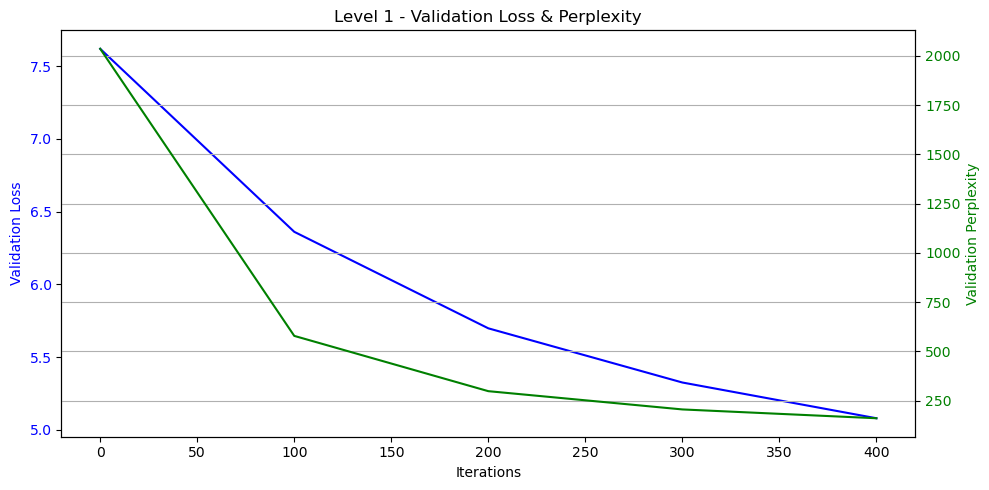

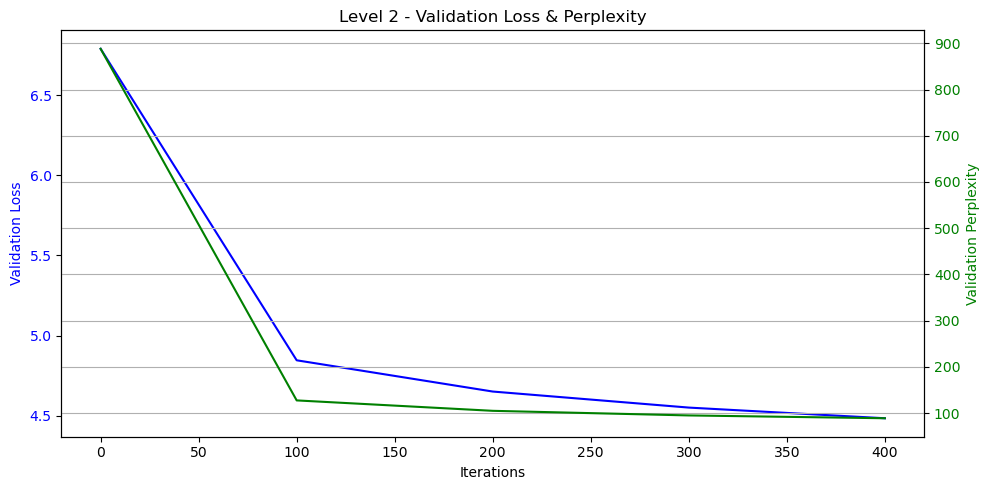

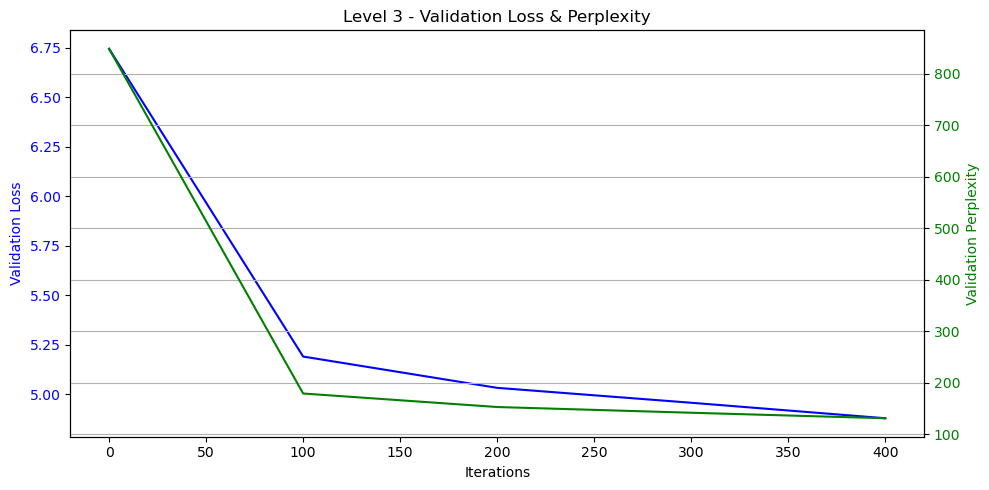

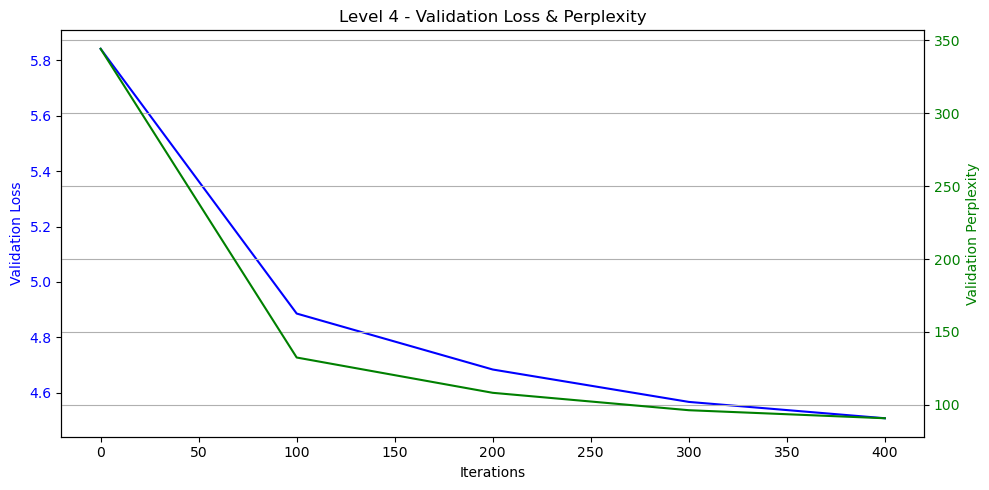

In [24]:
plot_metrics(all_metrics)

In [25]:
# BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
BASE_DIR = os.path.dirname(os.getcwd())

In [26]:
import joblib

# joblib.dump(model, '../Joblibs/transformer.joblib')
joblib.dump(model, os.path.join(BASE_DIR, 'Joblibs', 'transformer.joblib'))



['/Users/prakhar_patil/Desktop/SPE_Proj/TransformerMS/Joblibs/transformer.joblib']

In [36]:
   # Save final model
# vocab_size = tokenizer.get_vocab()
torch.save({
    'model_state_dict': model.state_dict(),
    'config': {
        'vocab_size': Config.vocab_size,
        'block_size': Config.block_size,
        'n_embd': Config.n_embd,
        'n_head': Config.n_head,
        'n_layer': Config.n_layer,
        'dropout': Config.dropout
    }
}, os.path.join(BASE_DIR, 'Joblibs', 'gpt_model.pth'))

In [37]:
joblib.dump(tokenizer, os.path.join(BASE_DIR, 'Joblibs', 'tokenizer.joblib'))

['/Users/prakhar_patil/Desktop/SPE_Proj/TransformerMS/Joblibs/tokenizer.joblib']

In [38]:
print("Tokenizer vocab size:", len(tokenizer.get_vocab()))


Tokenizer vocab size: 2000


In [39]:
print("Model vocab size:", model.token_embedding_table.num_embeddings)



Model vocab size: 2000


In [40]:
import torch

# Replace this path with the actual path to your .pth file
checkpoint_path = '/Users/prakhar_patil/Desktop/SPE_Proj/TransformerMS/Joblibs/gpt_model.pth'

# Load checkpoint
checkpoint = torch.load(checkpoint_path, map_location='cpu')  # or 'cuda' if using GPU


In [41]:
model.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

In [42]:
import joblib
tokenizer = joblib.load('../Joblibs/tokenizer.joblib')
print("Tokenizer vocab size:", len(tokenizer.get_vocab()))


Tokenizer vocab size: 2000


In [43]:
import torch
checkpoint = torch.load('../Joblibs/gpt_model.pth', map_location='cpu')
model_vocab_size = checkpoint['config']['vocab_size']
print("Model vocab size in checkpoint:", model_vocab_size)


Model vocab size in checkpoint: 2000


In [44]:
print("Model vocab size in checkpoint:", len(model_vocab_size))


TypeError: object of type 'int' has no len()